In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv("adult.csv")
#test=pd.read_csv("test.csv",skiprows = 1, header = None)

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.rename(columns={'capital-gain': 'capital gain', 'capital-loss': 'capital loss', 'native-country': 'country','hours-per-week': 'hours per week','marital-status': 'marital'}, inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital          48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital gain     48842 non-null  int64 
 11  capital loss     48842 non-null  int64 
 12  hours per week   48842 non-null  int64 
 13  country          48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
#replace nan value

In [8]:
df.isin(["?"]).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [9]:
df['country'] = df['country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

In [10]:
df.isnull().mean().sort_values(ascending=True)

age                0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital            0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital gain       0.000000
capital loss       0.000000
hours per week     0.000000
income             0.000000
country            0.017546
workclass          0.057307
occupation         0.057512
dtype: float64

In [11]:
#The variables  contain only a few observations with NA (1.7,5.73,5.75 %), 
#therefore, replacing those observations by random sampling the available labels is a good approach.

In [12]:
def random_rep(df,field):
    
    df[field+"_random"]=df[field]
    # random value to fill the na
    random_value=df[field].dropna().sample(df[field].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_value.index=df[df[field].isnull()].index
    df.loc[df[field].isnull(),field+'_random']=random_value
    

In [13]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
country             857
income                0
dtype: int64

In [14]:
df.shape

(48842, 15)

In [15]:
for Columns in ['country',"workclass",'occupation']:
    random_rep(df,Columns)

In [16]:
df.isnull().sum()

age                     0
workclass            2799
fnlwgt                  0
education               0
educational-num         0
marital                 0
occupation           2809
relationship            0
race                    0
gender                  0
capital gain            0
capital loss            0
hours per week          0
country               857
income                  0
country_random          0
workclass_random        0
occupation_random       0
dtype: int64

In [17]:
df = df.drop(['country',"workclass",'occupation'], axis = 1)

In [18]:
df.shape

(48842, 15)

In [19]:
#find and drop duplicates

In [20]:
df.duplicated().sum()

49

In [21]:
df.loc[df.duplicated(),:]

,age,fnlwgt,education,educational-num,marital,relationship,race,gender,capital gain,capital loss,hours per week,income,country_random,workclass_random,occupation_random
864,24,194630,Bachelors,13,Never-married,Not-in-family,White,Male,0,0,35,<=50K,United-States,Private,Prof-specialty
11189,37,52870,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,40,<=50K,United-States,Private,Exec-managerial
11212,29,36440,Bachelors,13,Never-married,Not-in-family,White,Female,0,0,40,<=50K,United-States,Private,Adm-clerical
13848,30,180317,Assoc-voc,11,Divorced,Not-in-family,White,Male,0,0,40,<=50K,United-States,Private,Machine-op-inspct
14723,48,136455,Some-college,10,Divorced,Not-in-family,White,Female,0,0,16,<=50K,United-States,Private,Sales
15960,18,378036,12th,8,Never-married,Own-child,White,Male,0,0,10,<=50K,United-States,Self-emp-inc,Farming-fishing
16658,23,35633,Some-college,10,Never-married,Not-in-family,White,Male,0,0,40,<=50K,United-States,Private,Sales
18476,39,184659,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,40,<=50K,United-States,Private,Machine-op-inspct
19399,19,130431,5th-6th,3,Never-married,Not-in-family,White,Male,0,0,36,<=50K,Mexico,Private,Farming-fishing
19726,41,116391,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,40,>50K,United-States,Private,Exec-managerial


In [22]:
df.drop_duplicates(keep="first",inplace=True)

In [23]:
df.duplicated().sum()

0

In [24]:
#we need to convert this data into numerical notations that our ML model can understand

In [25]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [26]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [27]:
df['race'] = df['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [28]:
df['marital'] = df['marital'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [29]:
df['workclass_random'] = df['workclass_random'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6,'Never-worked':7}).astype(int)

In [30]:
df['education'] = df['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,'9th': 15}).astype(int)

In [31]:
df['occupation_random'] = df['occupation_random'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4,'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10, 'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,'Protective-serv':14}).astype(int)

In [32]:
df['relationship'] = df['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,'Own-child': 5}).astype(int)

In [33]:
df["country_random"]=df["country_random"].map({'England':0,
'China':1,
'Cambodia':2,
'Taiwan':3,
'Puerto-Rico':4,
'Thailand':5,
'Jamaica':6,
'Philippines':7,
'El-Salvador':8,
'Ecuador':9,
'Outlying-US(Guam-USVI-etc)':10,
'Germany':11,
'Poland':12,
'Yugoslavia':13,
'Hungary':14,
'Guatemala':15,
'France':16,
'Peru':17,
'Japan':18,
'Nicaragua':19,
'Trinadad&Tobago':20,
'Iran':21,
'Portugal':22,
'Honduras':23,
'Cuba':24,
'Canada':25,
'Holand-Netherlands':26,
'Ireland':27,
'Mexico':28,
'Hong':29,
'Vietnam':30,
'Laos':31,
'United-States':32,
'Italy':33,
'Haiti':34,
'India':35,
'Scotland':36,
'Columbia':37,
'Dominican-Republic':38,
'Greece':39,
'South':40,}).astype(int)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48793 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                48793 non-null  int64
 1   fnlwgt             48793 non-null  int64
 2   education          48793 non-null  int32
 3   educational-num    48793 non-null  int64
 4   marital            48793 non-null  int32
 5   relationship       48793 non-null  int32
 6   race               48793 non-null  int32
 7   gender             48793 non-null  int32
 8   capital gain       48793 non-null  int64
 9   capital loss       48793 non-null  int64
 10  hours per week     48793 non-null  int64
 11  income             48793 non-null  int32
 12  country_random     48793 non-null  int32
 13  workclass_random   48793 non-null  int32
 14  occupation_random  48793 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 4.3 MB


In [35]:
df

,age,fnlwgt,education,educational-num,marital,relationship,race,gender,capital gain,capital loss,hours per week,income,country_random,workclass_random,occupation_random
0,25,226802,11,7,5,5,0,0,0,0,40,0,32,5,6
1,38,89814,3,9,2,4,3,0,0,0,50,0,32,5,1
2,28,336951,9,12,2,4,3,0,0,0,40,1,32,4,14
3,44,160323,0,10,2,4,0,0,7688,0,40,1,32,5,6
4,18,103497,0,10,5,5,3,1,0,0,30,0,32,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,9,12,2,1,3,1,0,0,38,0,32,5,2
48838,40,154374,3,9,2,4,3,0,0,0,40,1,32,5,6
48839,58,151910,3,9,1,3,3,1,0,0,40,0,32,5,3
48840,22,201490,3,9,5,5,3,0,0,0,20,0,32,5,3


In [36]:
#corelation

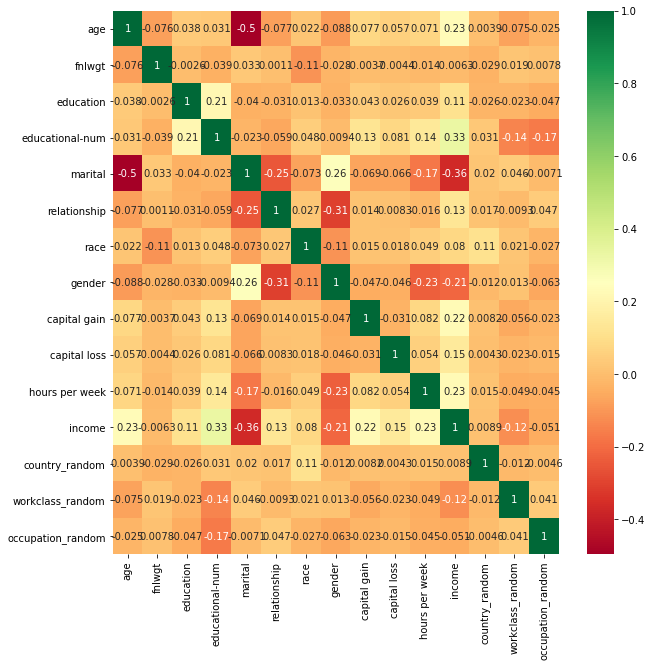

In [37]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#Figure( figsize =(20,7) )                    
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

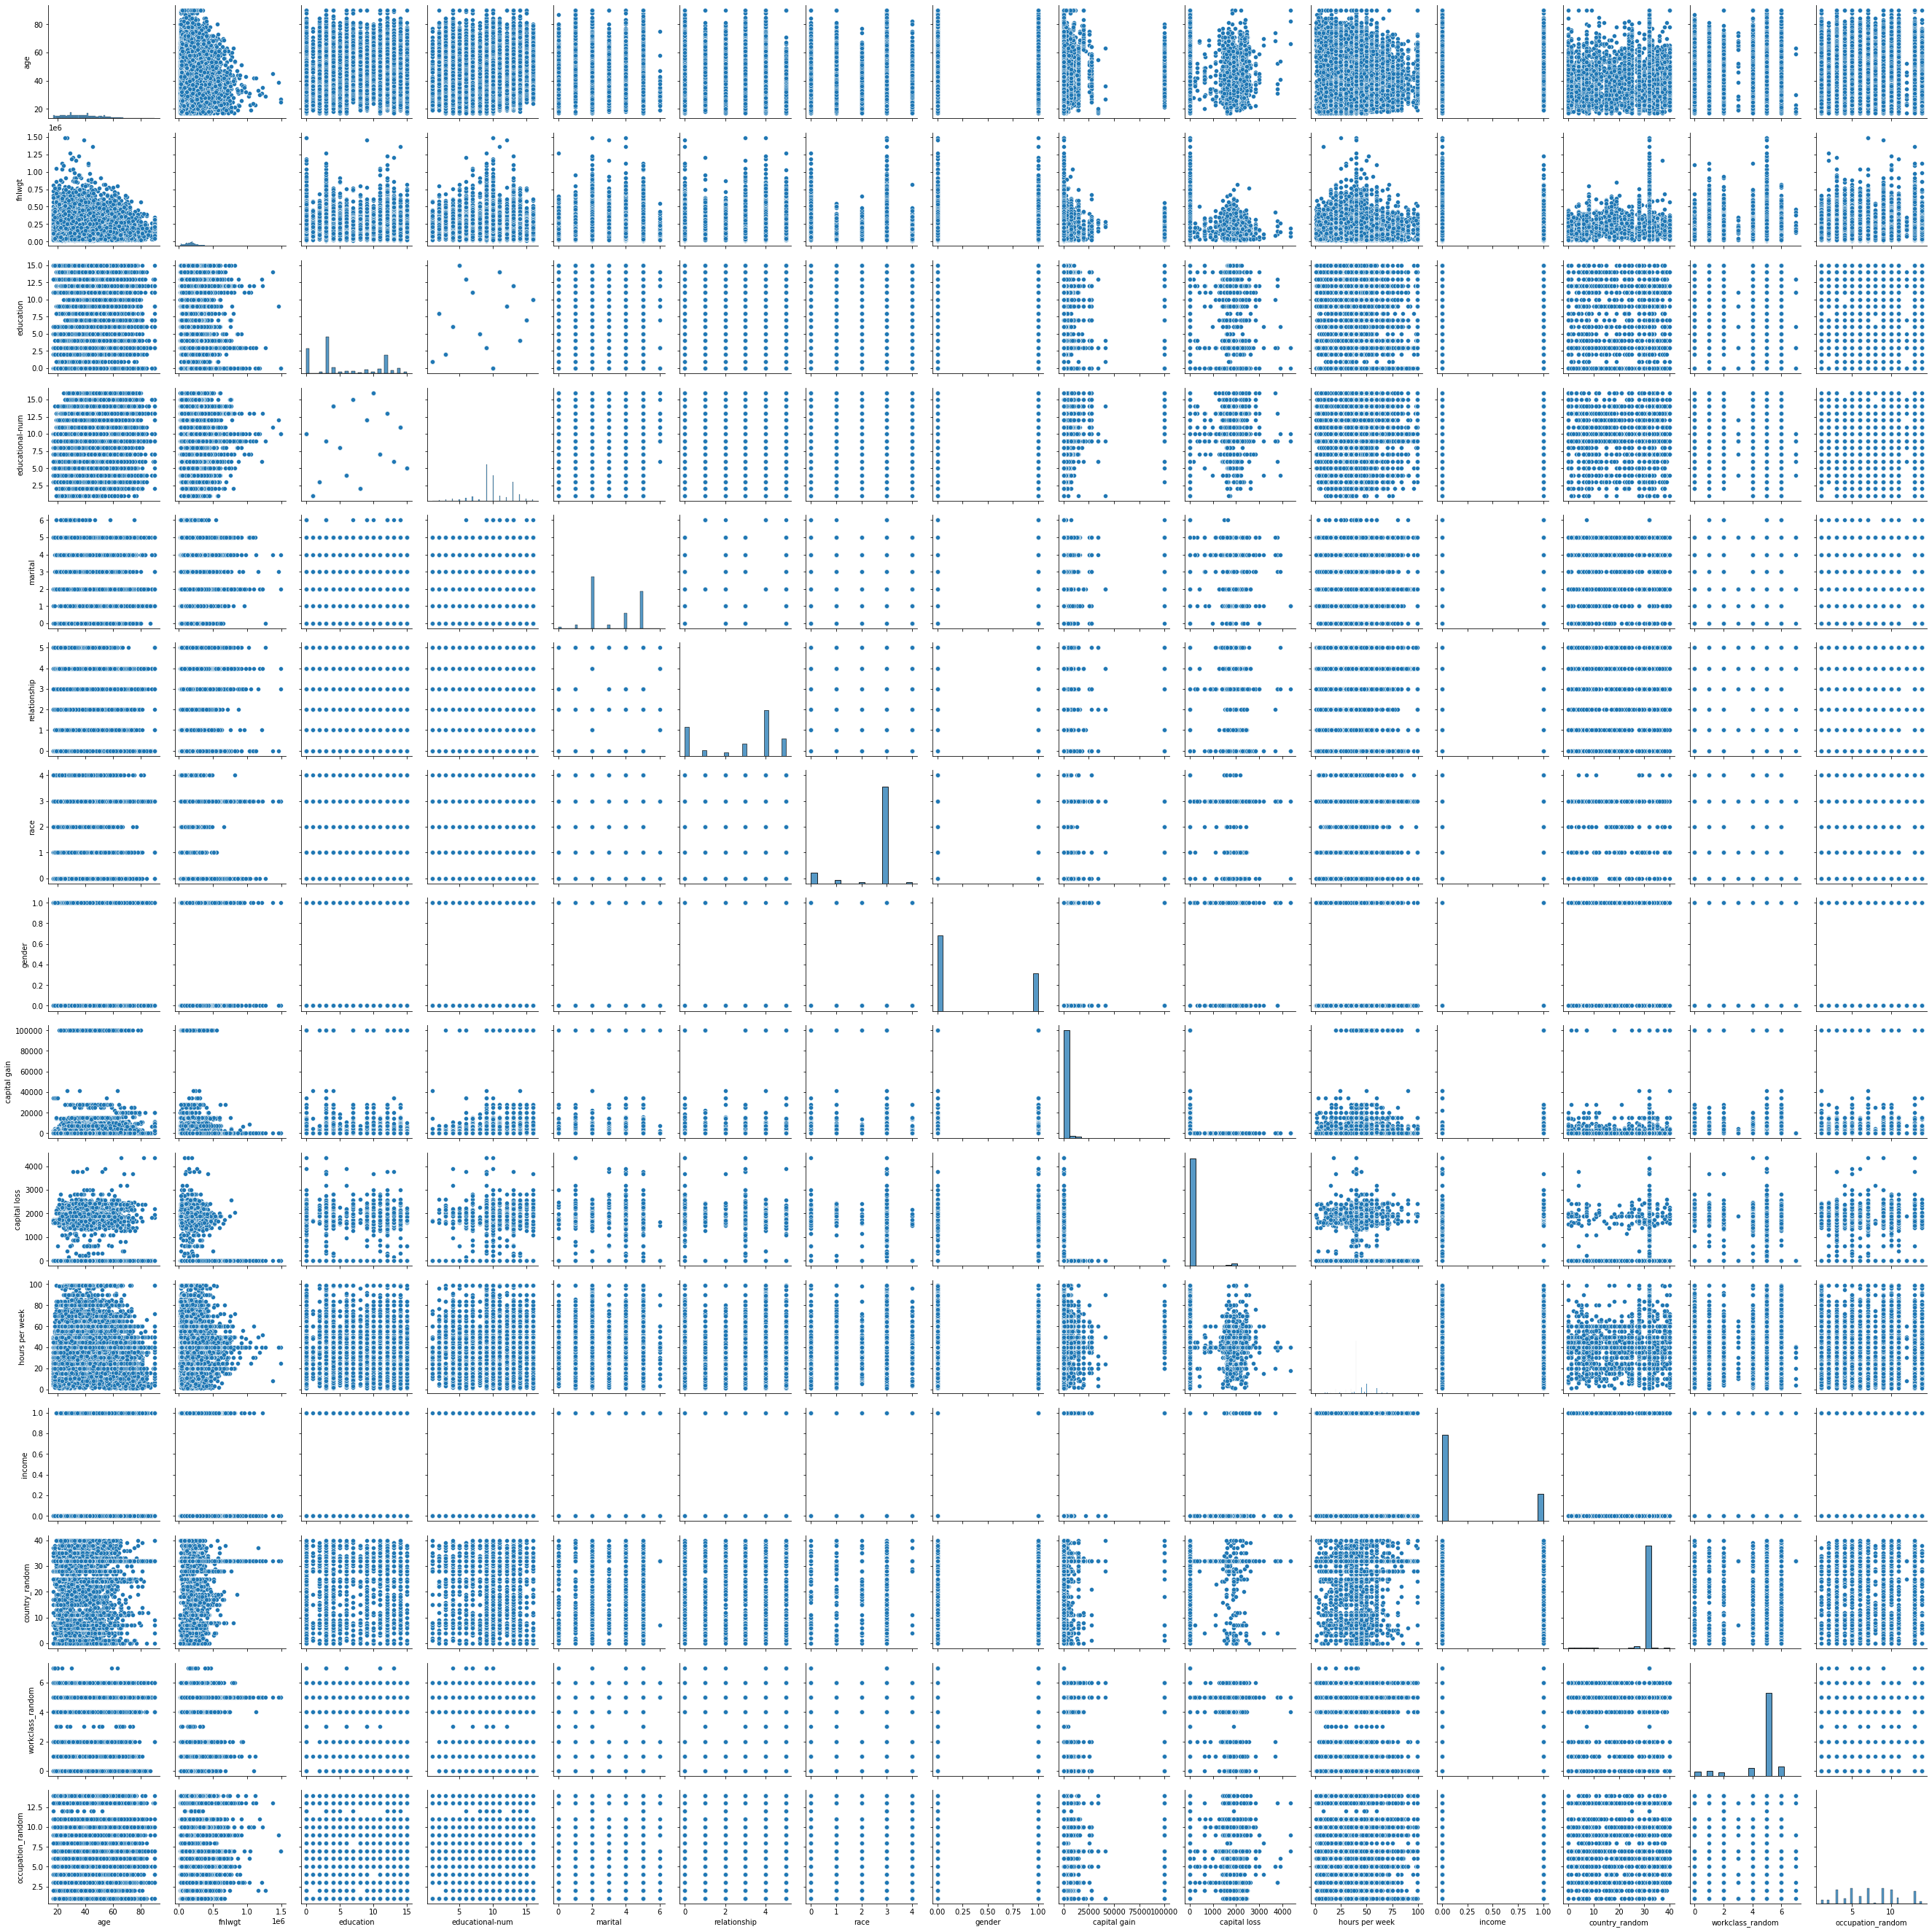

In [38]:
sns.pairplot(df)

<AxesSubplot:xlabel='education'>

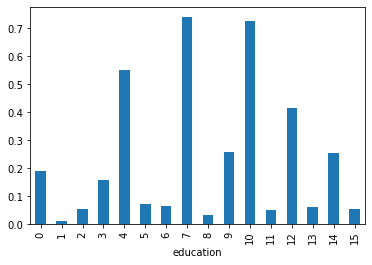

In [39]:
df.groupby('education').income.mean().plot(kind='bar')

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y=df["income"]
x=df.drop("income",axis=1)

In [42]:
print(y.shape)
print(x.shape)

(48793,)
(48793, 14)


In [43]:
x_train, x_test, y_train,y_test = train_test_split(x, y,test_size= 0.2,random_state = 10)

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)    

GradientBoostingClassifier()

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


results = pd.DataFrame([['xgboost', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

print(results)
print("\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)

     Model  Accuracy  F1 Score  Precision    Recall
0  xgboost  0.865355  0.680603   0.799543  0.592467


[[7045  351]
 [ 963 1400]]


In [66]:
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred)
print(acc)

0.8673464159450736


In [67]:
import pickle
pickle.dump(clf,open('model.pickle','wb'))

In [68]:
x_train

,age,fnlwgt,education,educational-num,marital,relationship,race,gender,capital gain,capital loss,hours per week,country_random,workclass_random,occupation_random
12830,22,192812,12,13,5,5,3,1,0,0,35,32,4,5
36231,41,356934,0,10,2,4,3,0,0,0,44,32,2,5
19984,21,249271,0,10,2,4,3,0,0,0,40,32,1,6
37825,25,113948,14,11,2,1,3,1,0,0,45,32,6,13
34366,44,207578,12,13,2,4,3,0,0,0,35,32,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40095,41,145441,14,11,2,4,3,0,0,0,40,13,6,9
28035,69,36956,0,10,2,4,3,0,20051,0,50,32,5,7
29217,69,163595,3,9,1,0,3,1,0,0,20,32,5,10
40097,42,76487,3,9,2,4,3,0,0,0,45,32,5,3


In [69]:
saved_model = pickle.load(open("model.pickle",'rb'))

In [70]:
saved_model.predict([[22,192812,12,13,5,5,3,1,0,0,35,32,4,5]])

C:\Users\Sagnik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [71]:
y_train

12830    0
36231    1
19984    0
37825    0
34366    1
        ..
40095    0
28035    1
29217    0
40097    0
17680    1
Name: income, Length: 39034, dtype: int32